In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
!mkdir data/
!wget https://raw.githubusercontent.com/kesh1523/Data/main/Data.csv -O data/unkown_clusters.

--2024-04-25 17:49:27--  https://raw.githubusercontent.com/kesh1523/Data/main/Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 677003 (661K) [text/plain]
Saving to: ‘data/unkown_clusters.’

data/unkown_cluster 100%[===================>] 661.14K  --.-KB/s    in 0.06s   

2024-04-25 17:49:27 (10.3 MB/s) - ‘data/unkown_clusters.’ saved [677003/677003]



In [3]:
Kesh_df = pd.read_csv("/content/data/unkown_clusters.")
Kesh_df = Kesh_df.drop(columns=['id'])
Kesh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  3500 non-null   float64
 1   O2_1    3500 non-null   float64
 2   O2_2    3500 non-null   float64
 3   O2_3    3500 non-null   float64
 4   O2_4    3500 non-null   float64
 5   O2_5    3500 non-null   float64
 6   O2_6    3500 non-null   float64
 7   O2_7    3500 non-null   float64
 8   NH4_1   3500 non-null   float64
 9   NH4_2   3500 non-null   float64
 10  NH4_3   3500 non-null   float64
 11  NH4_4   3500 non-null   float64
 12  NH4_5   3500 non-null   float64
 13  NH4_6   3500 non-null   float64
 14  NH4_7   3500 non-null   float64
 15  NO2_1   3500 non-null   float64
 16  NO2_2   3500 non-null   float64
 17  NO2_3   3500 non-null   float64
 18  NO2_4   3500 non-null   float64
 19  NO2_5   3500 non-null   float64
 20  NO2_6   3500 non-null   float64
 21  NO2_7   3500 non-null   float64
 22  

no missing value

all features are continuous (float)

there are 5 main indicators of river water quality: O2, NH4, NO2, NO3, BOD5; collected from 7 stations of the state water monitoring system.

all values are in unit of mg/cub.dm (mg/l)

In [4]:
Kesh_df

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,0.200,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
1,9.10,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,1.027,...,20.050,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23
2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,0.020,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,0.270,...,8.450,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,0.435,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,0.565,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,2.200,...,4.580,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,0.400,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20
3498,9.52,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,0.200,...,20.050,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00


# **Data Understanding**

In [5]:
Kesh_df.describe()

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,0.397956,...,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,0.452237,...,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,0.020000,...,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,0.200000,...,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,0.245000,...,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,0.405000,...,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,3.600000,...,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


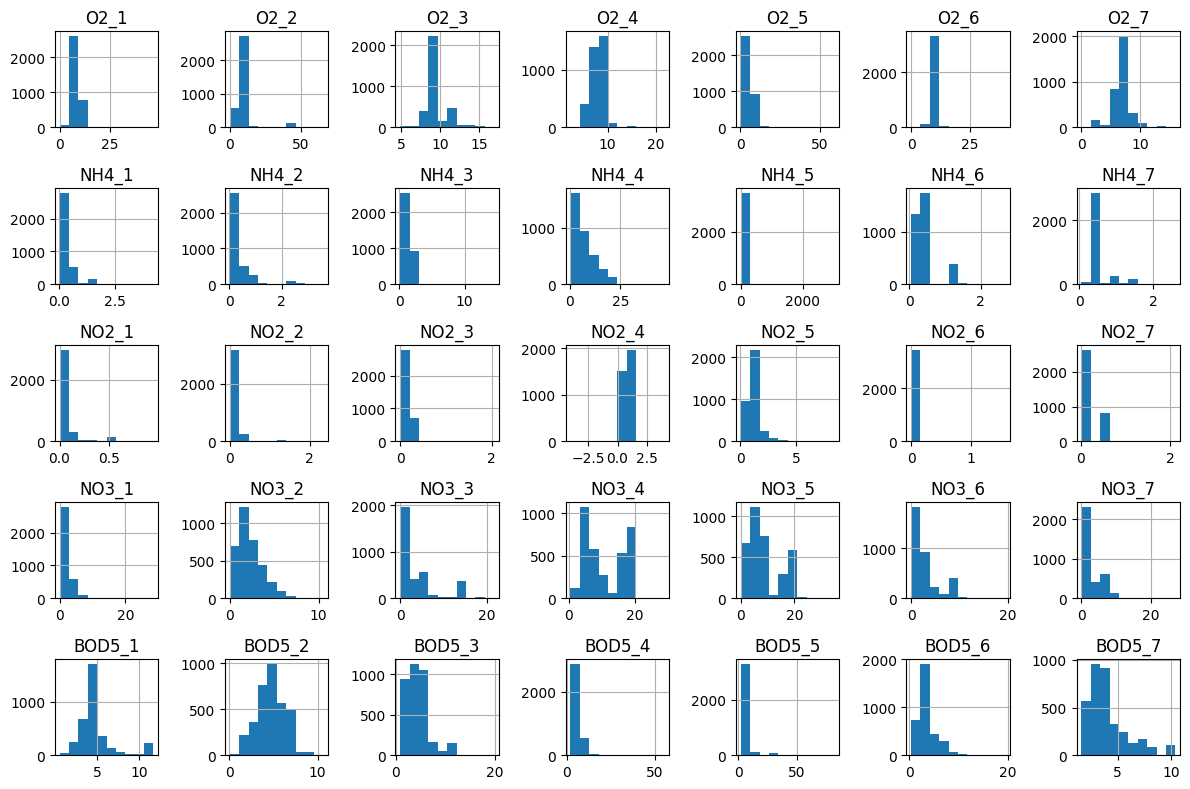

In [6]:
# drop 'target' column
Kesh_df_feature = Kesh_df.drop(columns=['target'])

# plot histogram for all features
Kesh_df_feature.hist(figsize=(12, 8), layout=(5, 7))

# adjust layout
plt.tight_layout()
plt.savefig('PLOT1.jpg');
plt.show()

most features are skewed to right

need to further explore whether is affected by outliers

some features have obvious outlier that need to be cleaned such as:
NH4_5 > 2000 mg/L
NO2_4 < 0 mg/L

# **Data Cleaning**

*Missing Value*

In [7]:
# handling missing value
missing_value = Kesh_df.isnull().sum()

if missing_value.sum() == 0:
    print("No missing values")

else:
    feature_missing = missing_value[missing_value > 0]
    print(feature_missing)

No missing values


*Duplicated Rows*

In [8]:
# handling duplicated rows
Kesh_df.duplicated().sum()

0

no missing values

no duplicated data

*Outlier*

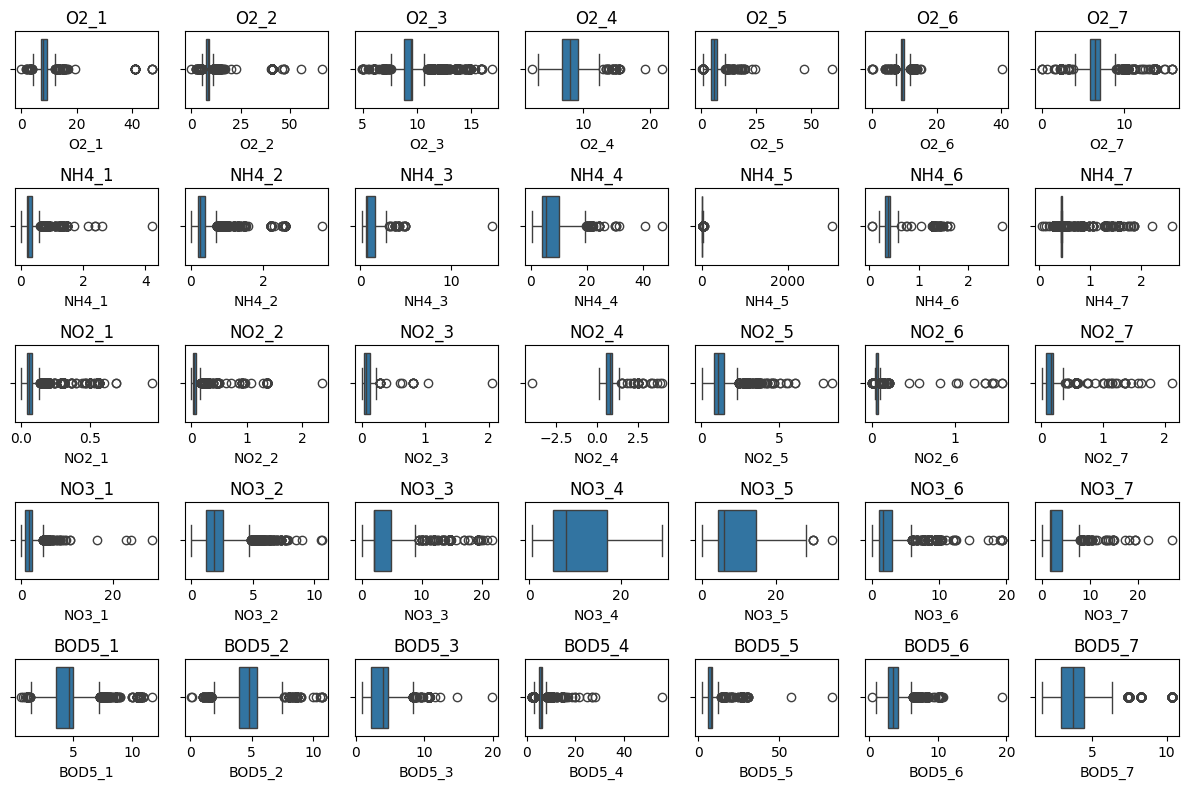

In [9]:
# plot boxplot to visualise potential outliers

# create 5x7 subplots
fig, axes = plt.subplots(5, 7, figsize=(12, 8))
axes = axes.flatten()

# plot boxplot for all features
for i, column in enumerate(Kesh_df_feature.columns):
    sns.boxplot(data=Kesh_df_feature[column], ax=axes[i], orient='h')
    axes[i].set_title(column)

# adjust layout
plt.tight_layout()
plt.savefig('PLOT2.jpg');
plt.show()

In [10]:
# handling negative data

# find rows with negative data
negative_row = Kesh_df[(Kesh_df < 0).any(axis=1)].index.tolist()
print("Row with negative value:", negative_row)

# replace negative value with NaN
Kesh_df[Kesh_df < 0] = np.nan


Row with negative value: [3166]


In [11]:
# handling extreme outlier
# consider > 100 mg/l as extreme

# find rows with value > 100
extreme_row = Kesh_df[(Kesh_df > 100).any(axis=1)].index.tolist()
print("Row with extreme value:", extreme_row)

# replace value > 100 with NaN
Kesh_df[Kesh_df > 100] = np.nan


Row with extreme value: [2662]


In [12]:
# handling outliers using z-score method

# copy Kesh_df for modification
Kesh_df2 = Kesh_df.copy()

# iterate over all (continuous) features
for col in Kesh_df.columns:

    # calculate z-scores for each data point in the column
    z_scores = np.abs(stats.zscore(Kesh_df2[col]))

    # define threshold
    threshold = 3

    # replace outliers with NaN
    Kesh_df2.loc[z_scores > threshold, col] = np.nan


In [13]:
# impute all NaN with KNN method

# create KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# impute NaN values using KNN
Kesh_df2_imputed = imputer.fit_transform(Kesh_df2)
Kesh_df2 = pd.DataFrame(Kesh_df2_imputed, columns=Kesh_df2.columns)


In [14]:
# ensure no missing value
missing_value = Kesh_df2.isnull().sum()

if missing_value.sum() == 0:
    print("No missing values")
else:
    feature_missing = missing_value[missing_value > 0]
    print(feature_missing)


No missing values


# **EDA**

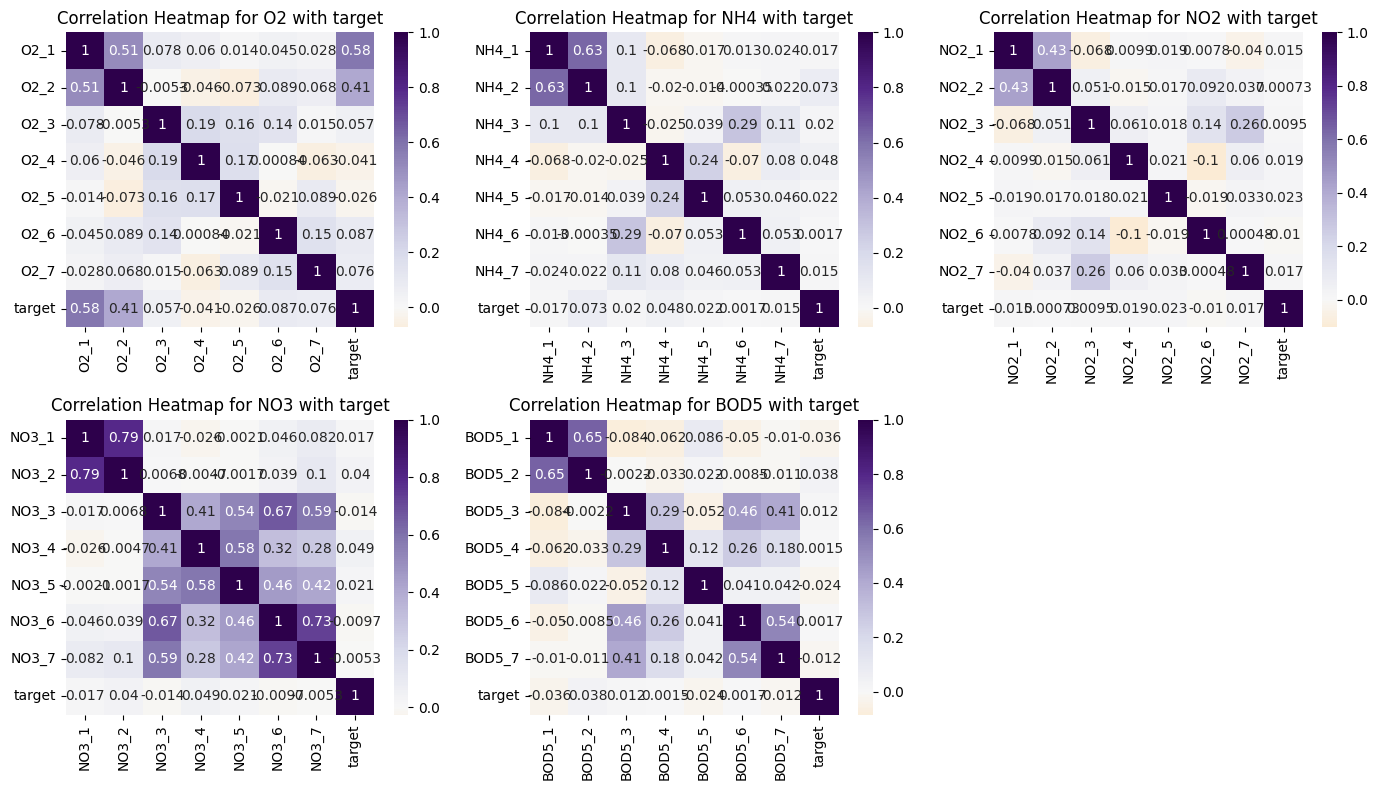

In [15]:
# correlation analysis for each main indicators with target

# create a dictionary of main indicator & their columns
main_indicators = {}

# define the main indicators
indicators = ["O2", "NH4", "NO2", "NO3", "BOD5"]
number_station = 7

# generate the column names for each main indicator
for indicator in indicators:
    main_indicators[indicator] = [f"{indicator}_{i}" for i in range(1, number_station + 1)]

# create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

# loop through each main indicator
for i, (indicator, columns) in enumerate(main_indicators.items()):

    # add target column to selected columns
    columns.append("target")

    # create correlation matrix
    corr_matrix = Kesh_df2[columns].corr()

    # plot heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='PuOr', center=0, ax=axes[i])
    axes[i].set_title(f'Correlation Heatmap for {indicator} with target')

# remove empty subplot
for i in range(len(main_indicators), len(axes)):
    fig.delaxes(axes[i])

# adjust layout
plt.tight_layout()
plt.savefig('PLOT3.jpg');
plt.show()


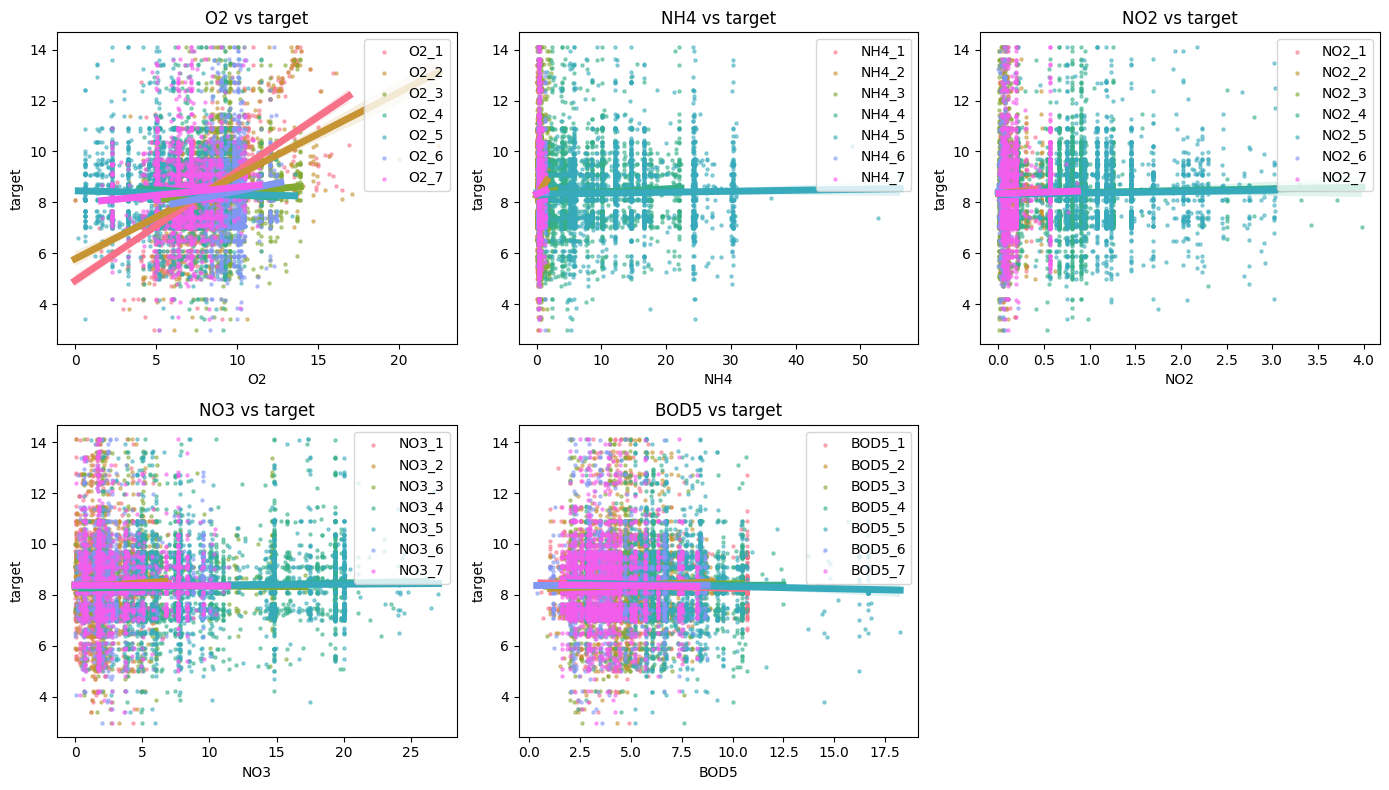

In [16]:
# relationship between each main indicators with target

# create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

# loop through each main indicator
for i, (indicator, columns) in enumerate(main_indicators.items()):

    # assign colours
    palette = sns.color_palette("husl", len(columns) - 1)

    # create scatter plot for each station
    for j, column in enumerate(columns[:-1]):
        sns.regplot(data=Kesh_df2, x=column, y="target", ax=axes[i], color=palette[j], label=f"{indicator}_{j + 1}", scatter_kws={'alpha': 0.5, 's': 5}, line_kws={'lw': 5})

    # set title & legend
    axes[i].set_title(f'{indicator} vs target')
    axes[i].set_xlabel(indicator)
    axes[i].set_ylabel("target")
    axes[i].legend(loc='upper right')

# remove empty subplot
for i in range(len(main_indicators), len(axes)):
    fig.delaxes(axes[i])

# adjust layout
plt.tight_layout()
plt.savefig('PLOT4.jpg');
plt.show()


# **Modelling**

In [17]:
# data splitting
Kesh_df_features = Kesh_df2.drop(['target'], axis=1)
Kesh_df_target = Kesh_df2['target']

# split df at 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(Kesh_df_features, Kesh_df_target, test_size=0.3, random_state=42)


In [18]:
# y_train = train.pop('target') # train is your submission!
from sklearn.linear_model import LinearRegression

# random forest
Kesh_lr = LinearRegression()

# train the DT model on the train data
Kesh_lr.fit(X_train, y_train)

# predict on test data
y_hat1 = Kesh_lr.predict(X_test)


In [19]:
# y_train = train.pop('target') # train is your submission!
from sklearn.tree import DecisionTreeRegressor

# random forest
Kesh_dt = DecisionTreeRegressor(max_depth=5)

# train the DT model on the train data
Kesh_dt.fit(X_train, y_train)

# predict on test data
y_hat2 = Kesh_dt.predict(X_test)


In [20]:
# y_train = train.pop('target') # train is your submission!

# random forest
Kesh_rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

# train the DT model on the train data
Kesh_rf.fit(X_train, y_train)

# predict on test data
y_hat3 = Kesh_rf.predict(X_test)


In [21]:
# RMSE
mse = mean_squared_error(y_test, y_hat1)
rmse = np.sqrt(mse)
print("RMSE:", round(rmse, 3))


RMSE: 1.004


In [22]:
# RMSE
mse = mean_squared_error(y_test, y_hat2)
rmse = np.sqrt(mse)
print("RMSE:", round(rmse, 3))


RMSE: 1.048


In [23]:
# RMSE
mse = mean_squared_error(y_test, y_hat3)
rmse = np.sqrt(mse)
print("RMSE:", round(rmse, 3))


RMSE: 0.965


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create the decision tree regressor
decision_tree = DecisionTreeRegressor()

# Define the parameter grid to search over
param_grid = {
    'max_depth': [None, 10, 20, 30],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],               # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                  # Minimum number of samples required to be at a leaf node
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)  # Assuming X_test is your test data
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Squared Error: 1.354146025443405


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Define the pipeline including scaling and Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define the parameter grid to search over
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization parameter values to try
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)  # Assuming X_test is your test data
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best hyperparameters: {'ridge__alpha': 100}
Mean Squared Error: 1.0048583663458175
